In [2]:
import numpy as np
import scipy as sc
import scipy.constants as const
import matplotlib.pyplot as plt

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

# FINIREEEEE

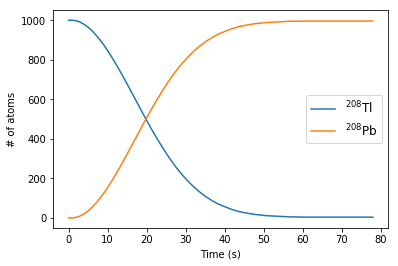

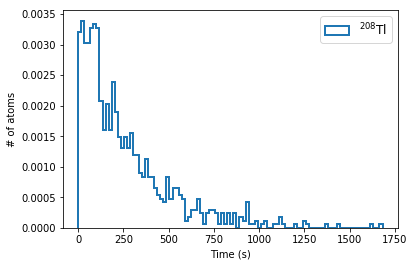

In [97]:
### First approach
def decay_prob(t, tau=3.052*60):
    return 1-2**(-t/tau)
    
tal=np.array([1000]); lea=np.array([0])
t=0
while tal[t]>3:
    p=decay_prob(t)
    n_decayed=np.floor(p*tal[t])
    tal=np.append(tal,tal[t]-n_decayed)
    lea=np.append(lea,lea[t]+n_decayed)
    t+=1
    
#Plotting
time=np.arange(0,tal.shape[0])
plt.plot(time, tal, label='$^{208}$Tl'); plt.plot(time, lea, label='$^{208}$Pb')
plt.xlabel('Time (s)'); plt.ylabel('# of atoms')
plt.legend(loc='best', fontsize=12); plt.show()


### Second approach
def icdf(t, tau=3.052*60):
    return (-1/(np.log(2)/tau))*np.log(1-t)

#Drawing random numbers from the distribution
z=np.random.random(1000)
dat=icdf(z)
_=plt.hist(dat, histtype='step', bins=100, density=True, linewidth=2, label='$^{208}$Tl')
#plt.plot(np.arange(len(z)), -np.sort(-dat))
plt.xlabel('Time (s)'); plt.ylabel('# of atoms')
plt.legend(loc='best', fontsize=12); plt.show()

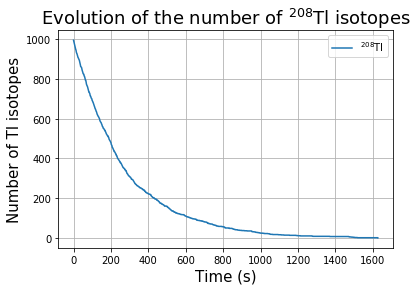

In [72]:
def evotimes(N, tstep, tau=3.052*60):
    T = []
    surviving = []
    s=N
    mu = np.log(2)/tau

    def prob(mu):
        return (-1/mu)*np.log(1-np.random.rand())
    
    for i in range(N):
        T.append(prob(mu))
    t=0
    while s>0:
        t+=tstep
        s=N
        for i in range(N):
            if T[i]<t:
                s-=1
        surviving.append(s)
    return T,surviving
    
    
N = 1000
tstep = 1

tm, Evo = evotimes(N, tstep)
times = np.arange(0,len(Evo))
plt.figure()
plt.title("Evolution of the number of $^{208}$Tl isotopes", fontsize=18)
plt.plot(times, Evo, label='$^{208}$Tl')
plt.grid()
plt.xlabel('Time (s)', fontsize=15)
plt.ylabel('Number of Tl isotopes', fontsize=15)
plt.legend()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

***
##### ---> Solution

We can inver the given relation and write: $$\theta = 2*arctan\Big(\frac{Ze^2}{2\pi \epsilon_0 E b}\Big)$$

By extracting the position of the impacting $\alpha$ particles from the 2D gaussian distribution one can retrive the $\textit{impact parameter}$ simply as 
$$b=r=\sqrt{-2\sigma^2 log(1-u)}$$
and use it to determine the fraction of particles that "bounce back".

In [4]:
# Draw samples from Box-Muller for the radiuses
sigma=5.2917721067e-13
u=np.random.random(10**6)
r=np.sqrt(-2*(sigma**2)*np.log(1-u))

# Rutherford cross section
def ruthc_ang(r, E=7.7*(10**6)*const.elementary_charge, Z=79):
    return 2*np.arctan(Z*(const.elementary_charge**2)/(2*np.pi*const.epsilon_0*E*r))

theta = ruthc_ang(r)
count = len(theta[theta > np.pi/2])/len(theta)
        
print('The percentage of α-particles which get reflected is: ', count,'%')

The percentage of α-particles which get reflected is:  0.001572 %


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

The errors have been estimated respectively:
$$\sigma(I_{hitmiss})=A\sqrt{\frac{p(1-p)}{N}}$$
$$\sigma(I_{hitmiss})=\frac{A\sigma[f(x)]}{\sqrt{N}}$$
With A equal to the area of the sampling distribution.

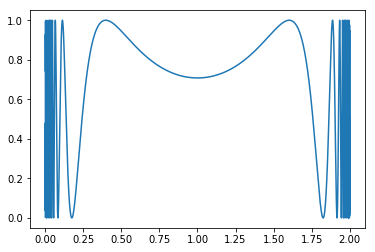

Area via Hir or Miss: 1.4542 ± 0.0028
Area via mean value: 1.451 ± 0.0053


In [11]:
def f(x):
    return (np.sin(1/(x*(2-x))))**2

x = np.linspace(0.000001,1.99999,10000)

plt.plot(x,f(x)); plt.show() #Plot

#hit or miss
N=100000
area = 2
rand_x = np.random.uniform(0,2,N)
rand_y = np.random.uniform(0,1,N)
hit = 0
for i in range(N):
    if (rand_y[i] < f(rand_x[i])):
        hit +=1

area_hit_or_miss = area*hit/N         
err = area*np.sqrt((hit/N)*(1-hit/N)/N)
print("Area via Hir or Miss: {:.5}" .format(area_hit_or_miss), "\u00B1 {:.2}" .format(err))

#mean value
area_mean_value = area*np.sum(f(x))/len(x)
err1 = area*np.std(f(x))/np.sqrt(len(x))
print("Area via mean value: {:.5}" .format(area_mean_value) , "\u00B1 {:.2}" .format(err1))

4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [59]:
def sphere(coord,radius=1):
    if np.sum(coord**2) <= radius**2:
        return 1
    else:
        return 0

def hit_miss_sphere(N, dim, radius=1):
    coord=np.random.uniform(-radius,radius,(N,dim))
    area=(2*radius)**dim
    count=0
    for i in np.arange(N):
        count+=sphere(coord[i], radius)
    integral=area*count/N
    err = area*np.sqrt((count/N)*(1-count/N)/N)
    return integral, err
    
N=10**5

# 2D-case
b_int, err=hit_miss_sphere(N,2)
print('Estimation of 2D surface of the unit sphere is: ', b_int, '\u00B1 {:.3}' .format(err))

# 10D-generalization
n_int, err=hit_miss_sphere(N,10)
print('Estimation of 2D volume of the unit sphere is: ', n_int, '\u00B1 {:.3}' .format(err))

Estimation of 2D surface of the unit sphere is:  3.14288 ± 0.00519
Estimation of 2D volume of the unit sphere is:  2.47808 ± 0.159


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

***
#### ---> Solution

We can see that using importance sampling we end up with an estimation in the form:
$$
I = \left\langle \frac{f(x)}{w(x)}\right\rangle \int_a^b w(x)dx \simeq \frac{1}{N}\sum_{i=1}^N \frac{f(x_i)}{w(x_i)}\int_a^b w(x)dx
$$
where the last integral can be computed analitically and it's equal to:
$$\int_a^b w(x)dx=\Big[2\sqrt{x}\Big]_{a}^{b}$$

In [63]:
def f(x):
    return (x**(-1/2))/(np.e**x+1)
def omega(x):
    return x**(-1/2)

N=10**5

x=np.random.random(N)
integral=np.sum(f(x)/omega(x))/N*2

print('The result of the integral is:', integral)

The result of the integral is: 0.7597096383017296
